<a href="https://colab.research.google.com/github/AlirezaAhadipour/NN-from-scratch/blob/main/makemore_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
words = open('names.txt', 'r').read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [5]:
# build the vocabulary of chars and mapping to/from integers
chars = sorted(list(set(''.join(words))))

str_to_int = {s:i+1 for i , s in enumerate(chars)}
str_to_int['.'] = 0

int_to_str = {i:s for s, i in str_to_int.items()}

print(int_to_str)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [6]:
# build the dataset
block_size =3   # num of chars we take to predict the next one
X, y = [], []

for word in words[:3]:
  print(word)

  context = [0] * block_size
  for char in word + '.':
    ix = str_to_int[char]
    X.append(context)
    y.append(ix)

    print(''.join(int_to_str[i] for i in context), '--->', int_to_str[ix])
    context = context[1:] + [ix]

X = torch.tensor(X)
y = torch.tensor(y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .


In [7]:
X.shape, X.dtype, y.shape, y.dtype

(torch.Size([16, 3]), torch.int64, torch.Size([16]), torch.int64)

In [8]:
C = torch.randn((27,2))

embd = C[X]
embd.shape

torch.Size([16, 3, 2])

In [9]:
embd.view(16,6)

tensor([[ 0.5836, -0.2747,  0.5836, -0.2747,  0.5836, -0.2747],
        [ 0.5836, -0.2747,  0.5836, -0.2747,  0.0940, -0.7404],
        [ 0.5836, -0.2747,  0.0940, -0.7404, -1.3847, -0.3826],
        [ 0.0940, -0.7404, -1.3847, -0.3826, -1.3847, -0.3826],
        [-1.3847, -0.3826, -1.3847, -0.3826, -0.2904, -0.3112],
        [ 0.5836, -0.2747,  0.5836, -0.2747,  0.5836, -0.2747],
        [ 0.5836, -0.2747,  0.5836, -0.2747, -0.7683,  0.4309],
        [ 0.5836, -0.2747, -0.7683,  0.4309,  0.3827, -0.3840],
        [-0.7683,  0.4309,  0.3827, -0.3840, -0.6390, -0.8424],
        [ 0.3827, -0.3840, -0.6390, -0.8424,  1.0732, -0.2185],
        [-0.6390, -0.8424,  1.0732, -0.2185, -0.6390, -0.8424],
        [ 1.0732, -0.2185, -0.6390, -0.8424, -0.2904, -0.3112],
        [ 0.5836, -0.2747,  0.5836, -0.2747,  0.5836, -0.2747],
        [ 0.5836, -0.2747,  0.5836, -0.2747, -0.2904, -0.3112],
        [ 0.5836, -0.2747, -0.2904, -0.3112,  1.0732, -0.2185],
        [-0.2904, -0.3112,  1.0732, -0.2

In [10]:
W1 = torch.randn(6, 100)
b1 = torch.randn(100)

h = torch.tanh(embd.view(embd.shape[0], 6) @ W1 + b1)
h

tensor([[-2.6138e-01, -8.8490e-01, -1.0396e-01,  ..., -5.8605e-01,
         -9.9224e-01, -9.1575e-01],
        [-8.1217e-04, -8.0681e-01,  1.6420e-01,  ..., -8.3550e-01,
         -9.8173e-01, -5.6618e-01],
        [ 5.7394e-01, -8.5786e-01,  9.9187e-01,  ..., -8.8825e-01,
         -8.4131e-01,  9.9784e-01],
        ...,
        [ 4.6255e-01, -7.6231e-01,  6.8288e-01,  ..., -7.1495e-01,
         -9.3428e-01,  2.1327e-02],
        [-7.0001e-01, -8.7415e-01,  1.9820e-01,  ..., -5.9415e-01,
         -9.9765e-01, -7.2466e-01],
        [ 6.8059e-01,  1.4183e-01, -8.7409e-01,  ..., -2.8493e-01,
         -9.6389e-01, -8.8213e-01]])

In [11]:
W2 = torch.randn(100, 27)
b2 = torch.randn(27)

logits = h @ W2 + b2
logits

tensor([[ -3.1785,   9.1847,   6.5409, -13.3372,  -8.1894,   9.4643,   1.9059,
          -8.4513, -14.8332,  -6.4604, -15.2068,  -1.7253,  -5.4350,  -3.9658,
           3.8276,  -6.2849, -10.1220,   8.6190, -12.2643,   6.1242,   2.2915,
           3.6802,   6.8184,  -0.4192,   3.3162,  -0.9008,  -2.4685],
        [  6.8965,  10.0857,   4.3416,  -9.6384, -11.7044,   1.6290,   7.7047,
          -9.9062, -14.6579, -10.0547, -12.6289,   2.2861,  -2.4043,  -3.7079,
           1.4497,  -5.3710, -13.5866,   8.6432, -12.5857,   8.4125,   1.1910,
           1.7824,   2.2760,  -1.1562,   4.2010,   0.7358,  -1.9599],
        [  3.3673,   1.6389,   3.1809, -19.6298,  -3.6038,   5.6918,   4.6301,
         -13.9430,  -4.0517,   1.4025, -15.9850,  -0.6841,  -8.5936, -11.9416,
          -4.7284,  -4.1680,  -4.2295,   3.0947,  -1.3812,   4.6272,  -1.6558,
           4.4245,   1.2547,  -0.4825,  -4.5935,   3.2773,   4.4925],
        [  4.3500,  -6.3247,   4.8005, -11.4578,   4.2272,  -6.1618,   3.3752,


In [12]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
loss = -prob[torch.arange(embd.shape[0]), y].log().mean()
loss

tensor(13.8891)

In [13]:
F.cross_entropy(logits, y)

tensor(13.8891)

In [14]:
# build the dataset
block_size =3   # num of chars we take to predict the next one
X, y = [], []

for word in words:

  context = [0] * block_size
  for char in word + '.':
    ix = str_to_int[char]
    X.append(context)
    y.append(ix)

    context = context[1:] + [ix]

X = torch.tensor(X)
y = torch.tensor(y)

In [15]:
# parameters
C = torch.randn((27,10))
W1 = torch.randn(30, 200)
b1 = torch.randn(200)
W2 = torch.randn(200, 27)
b2 = torch.randn(27)

parameters = [C, W1, b1, W2, b2]

n_param = sum(p.nelement() for p in parameters)
print(n_param)

11897


In [16]:
lri = []
lossi = []
stepi = []

In [17]:
for param in parameters:
  param.requires_grad = True

for i in range(200000):
    # minibatch
    ix = torch.randint(0, X.shape[0], (32,))   #batch of size 32

    # forward pass
    embd = C[X[ix]]
    h = torch.tanh(embd.view(embd.shape[0], 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, y[ix])

    # backward pass
    for param in parameters:
      param.grad = None

    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01
    for param in parameters:
      param.data += -lr * param.grad

    # track stats
    stepi.append(i)
    lossi.append(loss.log10().item())

# print(loss.item())

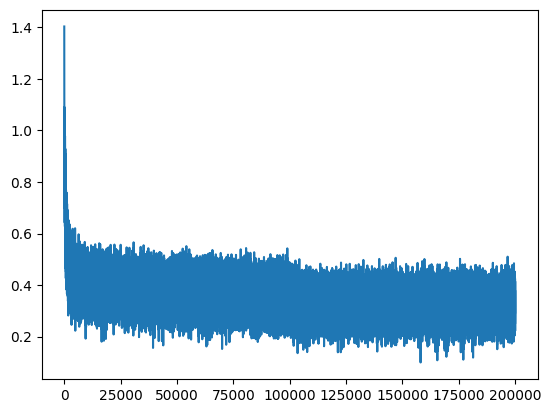

In [18]:
plt.plot(stepi, lossi)

In [19]:
embd = C[X]
h = torch.tanh(embd.view(embd.shape[0], 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, y)
loss.item()

2.1459596157073975

In [24]:
for _ in range(20):
  out = []
  context = [0] * block_size
  while True:
    embd = C[torch.tensor([context])]
    h = torch.tanh(embd.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1).item()
    context = context[1:] + [ix]
    out.append(ix)

    if ix == 0:
      break

  print(''.join(int_to_str[i] for i in out))

asalvinni.
kyia.
dyla.
sal.
tarim.
mick.
kaylee.
jaylon.
din.
crinn.
zyme.
sabarron.
abet.
pah.
tyrah.
alemirrincie.
faniya.
kynleez.
grachia.
temeir.
